<a href="https://colab.research.google.com/github/gcunhase/ML-Notebook/blob/master/models/rnn_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## 1. Libraries
*Installing and importing necessary packages*

In [1]:
!pip install tensorflow-gpu
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib import rnn
from tensorflow.nn.rnn_cell import LSTMCell

import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer 

    100% |████████████████████████████████| 345.2MB 49kB/s 


*List available devices*

In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12196637832052180843
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9347882029613591262
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11559948176051566735
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8914396775
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14963952587780468429
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


## 2. Dataset
*Data is split in 3 parts* : `mnist.train` (55,000 images), `mnist.test` (10,000 images), and `mnist.validation` (5,000 images)

In [9]:
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


## 3. Variables
*Indicate the root directory where the data must be downloaded, the directory where the results should be saved and the type of RNN (conventional, LSTM, GRU) and its respective hyper-parameters*

### Constants

In [0]:
# Define constants
params = {
  'num_hidden_units': 128,  # hidden layer
  'n_input': 28,  # MNIST data input (img shape: 28*28)
  'time_steps': 28,
  'lr': 0.001,
  'n_classes': 10,  # class 0-9
  'batch_size': 128,
  'cell_type': 'RNN',  # Options = [RNN, LSTM, GRU]
  'step': 10000,
  'display_step': 200,
  'use_gpu': True
}


### Placeholders

In [0]:
# Weights and biases
out_weights = tf.Variable(tf.random_normal([params['num_hidden_units'], params['n_classes']]))
out_bias = tf.Variable(tf.random_normal([params['n_classes']]))

# Placeholders: input image and label
x = tf.placeholder("float",[None, params['time_steps'], params['n_input']])
y = tf.placeholder("float",[None, params['n_classes']])

## 4. The Model: RNN

### Defining model

In [0]:
def RNN(x, w, b, cell_type='RNN'):
  # Get a list of 'timesteps' tensors of shape (bs, n_input=28)
  x_timesteps = tf.unstack(x, params['time_steps'], 1)
  
  # Cell definition
  if cell_type == 'RNN':
    rnn_layer = tf.keras.layers.SimpleRNNCell(params['num_hidden_units'])
  elif cell_type == 'LSTM':
    rnn_layer = tf.keras.layers.LSTMCell(params['num_hidden_units'], unit_forget_bias=True)  # rnn.BasicLSTMCell(params['num_hidden_units'], forget_bias=1.0)
  elif cell_type == 'GRU':
    rnn_layer = tf.keras.layers.GRUCell(params['num_hidden_units'])  # rnn.GRUCell(params['num_hidden_units'])
  
  # Cell output
  out, h = rnn.static_rnn(rnn_layer, x_timesteps, dtype=tf.float32)

  # Linear activation with the last output + softmax
  pred = tf.nn.softmax(tf.matmul(out[-1], w) + b)
  return pred

### Instantiating model

In [0]:
prediction = RNN(x, out_weights, out_bias, cell_type=params['cell_type'])

# Loss: cross-entropy
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=y))

# Optimizer: gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=params['lr'])
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
pred = tf.argmax(prediction, 1)
tar = tf.argmax(y, 1)
correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## 5. Train
*Start session and run*

None
Step 1, Minibatch loss 2.3247, Train acc 0.0938, Best train acc 0.0938
Step 200, Minibatch loss 2.1462, Train acc 0.3281, Best train acc 0.3281
Step 400, Minibatch loss 2.0478, Train acc 0.3984, Best train acc 0.3984
Step 600, Minibatch loss 1.9998, Train acc 0.4844, Best train acc 0.4844
Step 800, Minibatch loss 1.9510, Train acc 0.5312, Best train acc 0.5312
Step 1000, Minibatch loss 1.9322, Train acc 0.5391, Best train acc 0.5391
Step 1200, Minibatch loss 1.8984, Train acc 0.5938, Best train acc 0.5938
Step 1400, Minibatch loss 1.8086, Train acc 0.6562, Best train acc 0.6562
Step 1600, Minibatch loss 1.8282, Train acc 0.6562, Best train acc 0.6562
Step 1800, Minibatch loss 1.8429, Train acc 0.6484, Best train acc 0.6562
Step 2000, Minibatch loss 1.7698, Train acc 0.7188, Best train acc 0.7188
Step 2200, Minibatch loss 1.8398, Train acc 0.6250, Best train acc 0.7188
Step 2400, Minibatch loss 1.7942, Train acc 0.6953, Best train acc 0.7188
Step 2600, Minibatch loss 1.7788, Train 

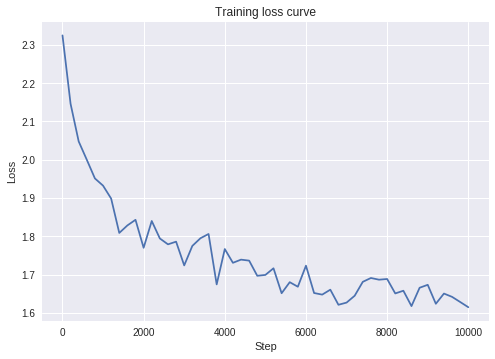

Model took 2.4461 mins (0.0408 hrs) to finish training with best train accuracy of 87.5000%


In [31]:
start_timer = timer()

# Make global session to use in test later
#  otherwise create local session with 'with tf.Session() as sess:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Run initializer: initializes variables with their assigned values
init = tf.global_variables_initializer()
print(sess.run(init))

loss_arr = []
step_arr = []
train_arr = []
for step in range(1, params['step']+1):
    # Next batch returns (bs, 28*28)
    batch_x, batch_y = mnist.train.next_batch(batch_size=params['batch_size'])
        
    # Reshape data to (bs, 28, 28)
    batch_x = batch_x.reshape((params['batch_size'], params['time_steps'], params['n_input']))
        
    # Backpropagation: run train_op variable
    sess.run(train_op, feed_dict={x: batch_x, y: batch_y})
        
    # Calculate batch loss (loss_op) and accuracy
    if step % params['display_step'] == 0 or step == 1:
        loss, acc = sess.run([loss_op, accuracy], feed_dict={x: batch_x, y: batch_y})
        loss_arr.append(loss)
        step_arr.append(step)
        train_arr.append(acc)
        print("Step {}, Minibatch loss {:.4f}, Train acc {:.4f}, Best train acc {:.4f}".format(step, loss, acc, max(train_arr)))
        
# Plot training loss curve
plt.plot(step_arr, loss_arr)
plt.title('Training loss curve')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

end_timer = timer() - start_timer

print("Model took {:.4f} mins ({:.4f} hrs) to finish training with best train accuracy of {:.4f}%".format(end_timer/60, end_timer/3600, max(train_arr)*100))

## 6. Test

Testing Accuracy: 77.34%


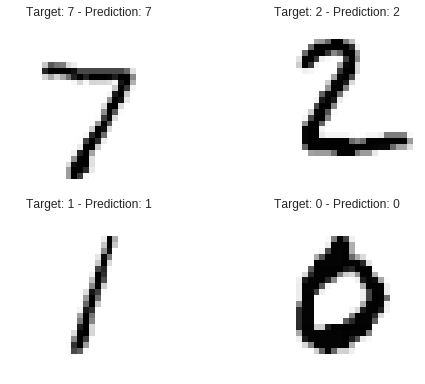

In [32]:
# Accuracy
test_len = 128
x_test_images = mnist.test.images[:test_len].reshape((-1, params['time_steps'], params['n_input']))
x_test_label = mnist.test.labels[:test_len]
print("Testing Accuracy: {:.2f}%".format(sess.run(accuracy, feed_dict={x: x_test_images, y: x_test_label})*100))

# Show image prediction test
x_test_images = mnist.test.images[:4].reshape((-1, params['time_steps'], params['n_input']))
x_test_label = mnist.test.labels[:4]

x_test_prediction = sess.run(pred, feed_dict={x: x_test_images})
x_test_target = sess.run(tar, feed_dict={y: x_test_label})

fig, axes = plt.subplots(nrows=2, ncols=2)
# axes = axes.ravel()

for i, ax in enumerate(axes.flat):
  ax.imshow(x_test_images[i]) 
  ax.set_title('Target: {} - Prediction: {}'.format(x_test_target[i], x_test_prediction[i]))
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()

## 7. Summary
*In the MNIST task, conventional RNN performs better due to the simplicity of the task. However, in tasks involving NLP, audio or even more complex images, LSTM and GRU perform better. The reason is that RNN isn't able to model data with long-term dependencies as well due to the gradients becoming increasingly small, vanishing gradient problem.*

<table align="left">
  <tr>
    <td><b>Model</b></td><td><b>Steps</b></td><td align="center"><b>Train Acc (%)</b></td><td align="center"><b>Test Acc (%)</b></td><td align="center"><b>Training Time (min)</b></td>
  </tr>
  <tr>
    <td rowspan="2">RNN</td><td>10,000</td><td align="center">75.00</td><td align="center">80.47</td><td align="center">2.2650</td>
  </tr>
  <tr>
    <td>100,000</td><td align="center">99.22</td><td align="center">96.88</td><td align="center">23.26</td>
  </tr>
  <tr>
    <td rowspan="2">LSTM</td><td>10,000</td><td align="center">41.41</td><td align="center">39.84</td><td align="center">16</td>
  </tr>
  <tr>
    <td>100,000</td><td align="center">84.37</td><td align="center">69.53</td><td align="center">161.65</td>
  </tr>
  <tr>
    <td rowspan="2">GRU</td><td>10,000</td><td align="center">25.00</td><td align="center">22.66</td><td align="center">12</td>
  </tr>
  <tr>
    <td>100,000</td><td align="center">64</td><td align="center">55.47</td><td align="center">121.46</td>
  </tr>
</table>